# 예제-1 서울시 구별 CCTV 현황 분석하기

## 1. 학습목표 
- 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교 
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
- Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
- Pandas와 Matplotlib의 기본적 사용법을 확인
- 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인
- Windows : ANSI Format , Linux : UTF-8 을 기본값으로 사용 < 꼭 명심할 것 >

## 2. 사전 전제조건 
- conda 환경에서 반드시 pandas, matplotlib, xlrd가 사전에 설치되어 있어야 함   
- 설치명령 : 
  - conda install pandas  
  - conda install matplotlib 
  - conda install xlrd   
- CCTV_Seoul , pop_Seoul의 구분 키값을 서로 맞추어 놓아야 한다.  
  - dataframe merge시 기준값을 공통으로 정해서 합쳐질 수가 있다.  

### import os 명령을 통하여 os안에 있는 기본명령을 사용할 수가 있다.  
- 기본 os 명령을 사용하려면 <font color='blue'>**import os**</font>명령을 사용한다.  
- *os.* 상태에서 **<탭>키**를 쳐서 부속된 속성(attribute)을 확인할 수가 있다.   
- **작업디렉토리변경(chdir), 작업디렉토리생성(mkdir)** 등 기본적인 작업이 가능하다.    
- 파이썬은 디렉토리(폴더) 주소를 판별할 때에 \은 \\로 나타내야 하고 /는 그냥 한개만 사용하면 된다.  
  - 따라서 리눅스와 파일을 주고받아야 할 경우 경로를 /로 표시해 두는 것이 좋다.  

In [1]:
import os   # OS 명령을 기본 사용하기 위한 라이브러리  

os.getcwd()   # 내가 현재 어느 폴더에 위치해 있는 지를 표시  

'C:\\Users\\A\\python_Data'

In [2]:
os.chdir('../python_Data/data')   # 상대경로 이동 

os.getcwd()           # 내가 현재 어느 폴더에 위치해 있는 지를 표시  

'C:\\Users\\A\\python_Data\\data'

### 파이썬 기본 경고메세지 처리(무시 OR 기본값) 하기

In [3]:
import warnings     # 파이썬 기본적인 경고메세지 처리하기     

warnings.filterwarnings(action='ignore')      # 기본적인 경고메세지 무시하기 
# warnings.filterwarnings(action='default')    # 기본적인 경고메세지 기본값으로 표시하기   

### 이 책에서 사용하는 소프트웨어 버전 

In [4]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib as mpl
print("matplotlib 버전:", mpl.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import xlrd as xld 
print("xlrd 버전:", xld.__version__)

Python 버전: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 2.1.1
matplotlib 버전: 3.7.2
NumPy 버전: 1.24.3
xlrd 버전: 2.0.1


In [5]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---------------- --------------------- 41.0/96.5 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 612.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### 자! 이제 계속 진행합니다.  

In [5]:
import pandas as pd    # 설치된 pandas library를 가져와서 pd로 치환해라 , 그 이후부터는 pd로 명명(alias)  

In [6]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul_CSV.csv',  encoding='ANSI')  # 파일이 일반 CSV(ANSI)형태일때 읽은 것
CCTV_Seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [7]:
CCTV_Seoul.head(10)       # 별도의 언급이 있지 않는 한 상위 5행을 display        
                        # 줄번호가 0부터 출발 됨에 주의 환기 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [8]:
CCTV_Seoul.head(3)   # 상위 3행만 display  

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [9]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',  encoding='UTF-8')  # 파일이 반드시 UTF-8로 변환되어 있어야 함 
CCTV_Seoul.head(3)    # UTF-8로 된 파일을 읽어서 상위 3행만 표시, UTF-8 형태로 저장하고 상위 5행만 읽은 것 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [10]:
CCTV_Seoul.columns        # 컬럼명을 모두 보고자 할 때에  

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [23]:
CCTV_Seoul.columns[0]     # python에서는 컬럼명을 지적시 반드시 INDEX가 0부터 출발한다. : 꼭 명심할 것    
                          # R에서는 1로 시작함    

'기관명'

In [24]:
CCTV_Seoul.columns[4]     # 2015년의 경우 0부터 출발하여 반드시 4번째 컬럼이 된다.  

'2015년'

In [25]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'소속'}, inplace=True)   # 컬럼 타이블을 기관명->소속으로 변환하여 조회 
CCTV_Seoul.head()  # 상위 5행만 조회 
                   # inplace=True라는 인자를 추가하여,  
                   #         결과값의 반환(replace)을 받지 않고서도 기존의 DataFrame이 변경되도록 한다.

,소속,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

#### xlrd : 파이썬 엑셀, CSV취급 패키지 
- 반드시 엑셀파일을 읽으려면 xlrd library(패키지 모듈)를 사전에 install 되어 있어야 한다.  
- 설치명령 : conda install xlrd (Anaconda Prompt에서 명령을 실행)


#### xlsxWriter <- 파이썬에서 엑셀을 다룰 때 취급하는 패키지 
  - 기본 패키지에 포함이 되어 제공된다.  
  - 관련 참고문서 : https://easytoread.tistory.com/entry/XlsxWriter%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80-Python-%ED%8C%8C%EC%9D%B4%EC%8D%AC
  - pip install XlsxWriter   
    - xlrd Or xlsxWriter중의 한 개는 반드시 설치되어 있어야 한다.  

In [105]:
#pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', engine = 'python', encoding='utf-8')  # Excell로 읽을때 기본 UTF-8로 읽었슴 
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls')  # Excell로 읽을때 기본 UTF-8로 읽었슴 
pop_Seoul.head()   # Head Title의 3줄이 겹쳐져서 보인다.  

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [106]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header   = 2,           # Header중에서 2줄을 건너뛰고 3번째 줄부터 가져와라 
                          usecols  = 'B, D, G, J, N')   # Data를 가져올 셀의 번호를 지정  
       #                   encoding ='UTF-8')     # 엑셀시트의 Head부분을 제외하고 읽어라. 지정한 셀(B,D,G,J,N)만 가져와라. 
pop_Seoul.head()                                # B(자치구), D(인구,타이틀은 계), G(한국인), J(등록외국인), N(65세이상고령자)    

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [107]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)   # 반드시 숙지요망  
pop_Seoul.head()                                                            # Head Title을 바꾸는 명령 

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초 
- 교재 Page 29 
- numpy, pandas 조합은 자주 사용하는 조합이고 매우 유용할 때가 많으니 꼭 사용법을 익혀둘 것 

In [12]:
import pandas as pd      # 엑셀과 같은 Sheet(Array)처리 
import numpy as np       # 과학기술 계산용 패키지  

In [13]:
s = pd.Series([1,3,5,np.nan,6,8])   # 기본적인 Series 자료구조 ([])로 표현 , nan = Not A Number의 뜻 
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- Series : numpy에서 1차원 배열을 표현할 때에 주로 사용됨, ndarray와 함께 사용함   
  - 파이썬의 [ ] (List)로 만들 수 있슴 
- NaN : Not A Number(결측치), 오라클에서 Null처리한 것과 유사하다고 보면 됨   
  - 조건에 해당하지 않는 기타조건을 표현할 때에 사용되기도 함    

In [14]:
dates = pd.date_range('20160101', periods = 6)    # 2016-01-01부터 시작해서 6일을 구간으로 잡았슴 
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
dates2 = pd.date_range('20231101', periods = 7)    # 2016-01-01부터 시작해서 6일을 구간으로 잡았슴 
dates2

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04',
               '2023-11-05', '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', freq='D')

- date_range : pandas에서 날짜형을 표현할 때에 많이 사용 
  - 기본 날짜를 지정하고 periods 옵션으로 7일간을 지정한다.     

In [16]:
# 임의의 6 X 4 배열을 만들고 Index를 앞에 만든 dates로 지정해라.  
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])  
df

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


In [17]:
df.head()                                 # 기본적으로 상위 5행만 보여준다.  
                                          # ()안에 숫자를 넣으면 해당 행 만큼을 조회할 수가 있슴  

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037


In [18]:
df.head(3)                                # 상단의 3행만 보이기 

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667


In [19]:
df.index             # 인덱스로 설정된 부분을 보여준다.  6 X 4 배열로 되어 있으므로 6개 

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.columns                               # 컬럼 Head를 보여준다.  

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
df.values                                # 들어가 있는 Value 값을 보여준다. 

array([[ 2.18150702,  1.44581925, -0.33140936,  1.90336957],
       [-1.11589366, -0.24723522,  1.26492503, -1.97647075],
       [ 0.76250148,  0.97099185,  1.6912421 , -0.80766719],
       [ 1.41003146, -1.43148538, -0.14285004,  0.35731547],
       [-1.29790954, -0.14478153, -0.8918044 , -0.96503707],
       [ 0.16050402,  0.99242965, -0.9180064 , -0.9425897 ]])

In [22]:
df.info()                            # pandas로 설정된 DataFrame의 상세정보(Description)를 보여준다.      

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2016-01-01 to 2016-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [23]:
df.describe() # 기초 통계량 

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.350123,0.264290,0.112016,-0.405180
std,1.381926,1.070540,1.109355,1.352331
min,-1.297910,-1.431485,-0.918006,-1.976471
25%,-0.796794,-0.221622,-0.751706,-0.959425
50%,0.461503,0.413105,-0.237130,-0.875128
75%,1.248149,0.987070,0.912981,0.066070
max,2.181507,1.445819,1.691242,1.903370


In [24]:
df.sort_values(by='B', ascending=False)         # B Cell의 값을 Descending Sort(내림차순) 
                                                # 질의문의 ORDER BY B Desc 한 것과 같은 효과 

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-06,0.160504,0.992430,-0.918006,-0.942590
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-04,1.410031,-1.431485,-0.142850,0.357315


In [25]:
df               # 상단 Jupyter 셀(Cell)에서 다양한 형태의 자료를 보여주었지만 df 본래 값은 변하지 않았다.    

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


- 내용이 너무 많은 경우 Jupyter Notebook에서는 내용을 줄여서 표현해 준다.   

In [27]:
df['A']                 # DataFrame으로 선언된 변수의 경우 
                        # ['A'] 와 같이 붙여주면 해당 컬럼만 Series로 보여준다.   

2016-01-01    2.181507
2016-01-02   -1.115894
2016-01-03    0.762501
2016-01-04    1.410031
2016-01-05   -1.297910
2016-01-06    0.160504
Freq: D, Name: A, dtype: float64

In [29]:
df[0:3] # 상위 0부터 2까지 Cell값들을 보여준다. (여기서 3번에 해당하는 값은 제외된다), 0,1,2 값만 보여준다. 

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667


In [30]:
df.head(3)

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667


In [31]:
df       # df[:]

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


In [32]:
df[0:0]

,A,B,C,D


In [33]:
df['20160102':'20160104']   # 2018-01-02 ~ 2018-01-04 까지 보여준다. 
                            # 실제적으로 Index 0은 컬럼Title이므로 Title을 포함해서 보여준다.  

,A,B,C,D
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315


- 특정 날짜의 데이터만 보고 싶으면 df.loc 명령을 사용하면 된다.  
- loc는 localtion 옵션으로 슬라이싱(slicing)할 때에 loc 옵션을 이용해서 위치 값을 지정할 수가 있다.   

In [34]:
df.loc[dates[0]]           # date[0]에 해당하는 item 2016-01-01 item에 해당하는 원소값들을 보여준다.  

A    2.181507
B    1.445819
C   -0.331409
D    1.903370
Name: 2016-01-01 00:00:00, dtype: float64

In [35]:
df.loc[dates[1]] 

A   -1.115894
B   -0.247235
C    1.264925
D   -1.976471
Name: 2016-01-02 00:00:00, dtype: float64

In [38]:
df.loc[ : ,['A','B']]       # index, A,B 컬럼의 데이터를 보여준다.  
                          # [] 안에서 : 왼쪽 공란은 처음부터 가져오라는 의미 , index[0]부터 가져온다.   
                          #  오른쪽 ['A','B']는 A,B 셀만 가져오라는 의미  

,A,B
2016-01-01,2.181507,1.445819
2016-01-02,-1.115894,-0.247235
2016-01-03,0.762501,0.970992
2016-01-04,1.410031,-1.431485
2016-01-05,-1.297910,-0.144782
2016-01-06,0.160504,0.992430


In [39]:
df.loc[ : ,['C','D']]   

,C,D
2016-01-01,-0.331409,1.903370
2016-01-02,1.264925,-1.976471
2016-01-03,1.691242,-0.807667
2016-01-04,-0.142850,0.357315
2016-01-05,-0.891804,-0.965037
2016-01-06,-0.918006,-0.942590


- A,B의 모든 행을 보고 싶다면 df.loc[:,['A','B']]  이렇게 표현한다.  
- 이 때에 행과 열의 모든 범위를 지정할 수가 있다.  

In [45]:
df.loc['20160102':'20160104',['A','B']]   # 이렇게 사용하는 것이 매우 바람직함  

,A,B
2016-01-02,-1.115894,-0.247235
2016-01-03,0.762501,0.970992
2016-01-04,1.410031,-1.431485


In [46]:
df.loc['20160102',['A','B']]            # 2018-01-02의 A,B 셀의 데이터만 선택된다.    

A   -1.115894
B   -0.247235
Name: 2016-01-02 00:00:00, dtype: float64

In [47]:
df.loc[dates[0],'A'] # 20160101에 a컬럼 표시 

2.1815070206308413

In [48]:
df.loc[dates[0],'B'] # 20160101에 b컬럼 표시 

1.4458192537588483

In [50]:
df.loc[dates[0],['A', 'B']] #2016-01-01

A    2.181507
B    1.445819
Name: 2016-01-01 00:00:00, dtype: float64

In [51]:
df.loc[dates[1],['A', 'B','C','D']] #2016-01-02

A   -1.115894
B   -0.247235
C    1.264925
D   -1.976471
Name: 2016-01-02 00:00:00, dtype: float64

- dates[0]에 맞는 날짜인 2018-01-01의 A컬럼의 데이터만 확인할 수가 있다.  
- 그러나 loc명령과 달리 행과 열의 번호를 이용해서 데이터에 바로 접근하고 싶을 수 있는데 
  - 그 명령이 iloc 이다.
  - iloc를 사용하면 행이나 열의 범위를 지정하면 된다.  
  - 특히 콜론(:)을 사용하면 전체를 조회함을 의미한다.  

In [52]:
# 행 중심 접근 
df.iloc[3]           # Index 3에 해당하는 2016-01-04<4번째 행> Item에 해당하는 Cell값들을 보여준다.  
                     # Index가 0부터 시작하므로 실제적으로는 4번째 행이 조회된다.   

A    1.410031
B   -1.431485
C   -0.142850
D    0.357315
Name: 2016-01-04 00:00:00, dtype: float64

In [54]:
# row: 3, 4, column: 0, 1 

df.iloc[3:5,0:2]    # index 3~5(실제적으로 5는 제외)에 해당하고 A,B Cell값을 보여준다.  
                    # 실제적으로는 3,4번 행을 그리고 컬럼은 A,B 컬럼을 가져와서 조회해 준다.   

,A,B
2016-01-04,1.410031,-1.431485
2016-01-05,-1.297910,-0.144782


In [55]:
df.iloc[[1,2,4],[0,2]]   # 콤마(,)로 행이나 열을 지정해서 데이터를 가져올 수 있다.  
                         # 행이나 열에 대해 한 쪽은 전체를 의미하게 될 때에는 그냥 콜론(:)만 사용하면 된다.   

,A,C
2016-01-02,-1.115894,1.264925
2016-01-03,0.762501,1.691242
2016-01-05,-1.297910,-0.891804


In [56]:
df.iloc[1:3, : ]    # 인덱스가 0부터 출발하므로 2018/01/02~2018/01/03이 됨, 여기서 인덱스 3에 해당하는 것은 제외됨  
                    # 오른쪽 : 은 전체 셀을 가져오라는 의미   

,A,B,C,D
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667


In [57]:
df.iloc[1:3, 0:4]

,A,B,C,D
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667


In [58]:
df.iloc[ : , : ] # df의 데이터 모두 출력 표시.

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


In [59]:
df.iloc[0:6 , 0:4] # df의 데이터 모두 출력 표시.

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


In [60]:
df.iloc[ : ,1:3]        # 왼쪽은 전체 레코드 , 오른쪽은 A,B (인덱스 3은 제외)  
                        # 인덱스로 조회 시는 n개의 셀을 가져오려는 경우 항상 n+1로 해야 함     

,B,C
2016-01-01,1.445819,-0.331409
2016-01-02,-0.247235,1.264925
2016-01-03,0.970992,1.691242
2016-01-04,-1.431485,-0.142850
2016-01-05,-0.144782,-0.891804
2016-01-06,0.992430,-0.918006


In [61]:
df

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


In [62]:
df[df.A > 0]          # A의 Cell값이 0보다 큰 Cell값만 보여라 

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


In [63]:
df[df.A > 1]      

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-04,1.410031,-1.431485,-0.142850,0.357315


In [64]:
df[df > 0]        # DataFrame의 List중에서 Cell값이 0보다 큰 값은 모두 가져온다.   
                  # 이때 해당하지 않는 값은 NaN(Not A Number : 결측치)로 표시된다  

,A,B,C,D
2016-01-01,2.181507,1.445819,NaN,1.903370
2016-01-02,NaN,NaN,1.264925,NaN
2016-01-03,0.762501,0.970992,1.691242,NaN
2016-01-04,1.410031,NaN,NaN,0.357315
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,0.160504,0.992430,NaN,NaN


In [65]:
# Data Frame의 복제 (df -> df2로 복제) 
#  df2 = df.copy([:])
df2 = df.copy()      # dataframe을 복사하여 새로운 df2로 복제함   
                     # 기존의 df에 새로운 가공을 하는 경우 반드시 이렇게 복제하여 다른 변수로 주어 사용할 것 
                     # 그렇게 하여야 원본을 보전하고 다양한 작업 및 비교를 할 수가 있슴  (반드시 명심 또 명심 !!!)   
df2        

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


- DataFrame을 복사할 때는 그냥 = 기호를 이용해서 복사하면 
- 실제 데이터의 내용이 복사되는 것이 아니라 데이터 위치만 복사되기 때문에 원본 데이터는 하나만 있게 된다.  

In [66]:
df2['E'] = ['one', 'one','two','three','four','three']
df2                  # 셀을 하나 더 추가  

,A,B,C,D,E
2016-01-01,2.181507,1.445819,-0.331409,1.903370,one
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471,one
2016-01-03,0.762501,0.970992,1.691242,-0.807667,two
2016-01-04,1.410031,-1.431485,-0.142850,0.357315,three
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037,four
2016-01-06,0.160504,0.992430,-0.918006,-0.942590,three


In [67]:
df2['E'].isin(['two','four'])     # E Cell중에서 two, four가 있는 지 판별해라   

2016-01-01    False
2016-01-02    False
2016-01-03     True
2016-01-04    False
2016-01-05     True
2016-01-06    False
Freq: D, Name: E, dtype: bool

In [68]:
df2[df2['E'].isin(['two','four'])]   # 위의 조건에 맞는 데이터만 선택이 되어 조회가 가능하다.  

,A,B,C,D,E
2016-01-03,0.762501,0.970992,1.691242,-0.807667,two
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037,four


In [69]:
df

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,-1.115894,-0.247235,1.264925,-1.976471
2016-01-03,0.762501,0.970992,1.691242,-0.807667
2016-01-04,1.410031,-1.431485,-0.142850,0.357315
2016-01-05,-1.297910,-0.144782,-0.891804,-0.965037
2016-01-06,0.160504,0.992430,-0.918006,-0.942590


In [72]:
df.apply(np.cumsum)      # Cell의 누적합계를 구해라   
                         # numpy에서 특정 함수를 적용시키고 싶을 때는 apply를 적용한다.    

,A,B,C,D
2016-01-01,2.181507,1.445819,-0.331409,1.903370
2016-01-02,1.065613,1.198584,0.933516,-0.073101
2016-01-03,1.828115,2.169576,2.624758,-0.880768
2016-01-04,3.238146,0.738091,2.481908,-0.523453
2016-01-05,1.940237,0.593309,1.590103,-1.488490
2016-01-06,2.100741,1.585739,0.672097,-2.431080


In [73]:
df.apply(lambda x: x.max() - x.min())    # lamda값을 구해라  
                                         # 최대값과 최소값의 차이 (거리)를 알고 싶으면 one line 함수인 lamda를 이용한다.  

A    3.479417
B    2.877305
C    2.609249
D    3.879840
dtype: float64

In [78]:
df2.apply(lambda x2: x.max() - x2.min()) # 문자열이 들어있으므로 연산 불가. 

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U4')) -> None

# 4. CCTV 데이터 파악하기

In [79]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [80]:
CCTV_Seoul.columns      # 서울시 CCTV설치현황의 Column Head값을 불러온다.                       

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [81]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [82]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [83]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

In [108]:
pop_Seoul.head()   

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [109]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [110]:
pop_Seoul.drop([0], inplace=True)    # 0번 레코드 삭제 

In [111]:
pop_Seoul   # 전체 자료를 조회  

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [112]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [113]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [114]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [115]:
pop_Seoul.drop([26], inplace=True)     # 26행 레코드 결측치포함부분 삭제  

In [116]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [118]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [119]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [120]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [121]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [122]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [123]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

In [124]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [125]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [126]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [127]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [128]:
# DataFrame을 세로로 합치기 
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [129]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [130]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [132]:
result.index.get_level_values(0) # 인덱싱을 가로로 표기

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [133]:
result.index.get_level_values(1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [134]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [139]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1) #axis=1 컬럼추가 , 가로 붙이기
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [140]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result2 = pd.concat([df1, df4], axis=0) #axis=0 행추가 , 세로 붙이기, 결론: 합치면 안됩니다.
result2

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [141]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [142]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [143]:
result      # Outer Join 

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [144]:
result = pd.concat([df1, df4], axis=1, join='inner')   # inner Join과 같다. , axis=1 컬럼추가  
result                                                 # 데이터 처리 결과를 믿을 수 없는 경우에 해당.

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [145]:
result = pd.concat([df1, df4], axis=1, sort = False)  # df1을 기준으로 df4를 병합 , join_axes=[df1.index]
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [146]:
result = pd.concat([df1, df4], ignore_index=True, sort=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [336]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [337]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [338]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [339]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [340]:
pd.merge(left, right, how='left', on='key')     # Left Outer Join 

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [341]:
pd.merge(left, right, how='right', on='key')   # right Outer Join 

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [342]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [343]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [344]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True)   # 컬럼 타이블을 기관명->소속으로 변환하여 조회 
CCTV_Seoul.head()         # 상위 5행만 조회 

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [345]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [346]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [347]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [348]:
data_result.to_csv('../data/01-분석기준 데이터.csv', encoding='utf-8-sig')

In [349]:
data_result1 = pd.read_csv('../data/01-분석기준 데이터.csv', encoding='utf-8-sig')
data_result1.head(7)

,Unnamed: 0,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,5,광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,6,구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506


In [350]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [351]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])  # 상관계수를 구했다. 

array([[ 1.        , -0.25866272],
       [-0.25866272,  1.        ]])

In [352]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.05230165],
       [-0.05230165,  1.        ]])

In [353]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

In [354]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
은평구,2108,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [355]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [356]:
data_result.sort_values(by='외국인비율', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
영등포구,1277,157.979798,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
중구,1023,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [357]:
data_result.sort_values(by='고령자비율', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
종로구,1619,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
중구,1023,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
서대문구,1254,48.578199,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 8. 그래프 그리기 기초 - matplotlib

- matplotlib : 파이썬으로 Graphic OR Chart를 그리는 기본 Utility Mopdule 
- R에서 사용하는 ggplot2와 비슷함   
- 파이썬에서는 matplotlib를 기준으로 다양한 그래픽 툴을 제공함  
- 전제조건 : conda 환경에서 미리 install되어 있어야 함   
  - conda install matplotlib 

In [107]:
import  matplotlib  as  mpl      # matplotlib를 가져와서 기본적으로 m[l변수로 놓는다. ]
import matplotlib.pyplot as plt  # matplotlib.pyplot 를 plt로 놓는다.  

- % 파이썬에서 OS명령을 기본적으로 실행하는 명령  
- 리눅스에서는 $ 명령으로 대체될 수가 있슴    

In [108]:
%matplotlib inline                                

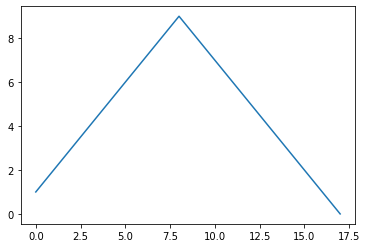

In [109]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()        # 실제적으로 Graphic을 그리는 부분   

In [110]:
import numpy as np

t = np.arange(0,12,0.01)

y = np.sin(t)

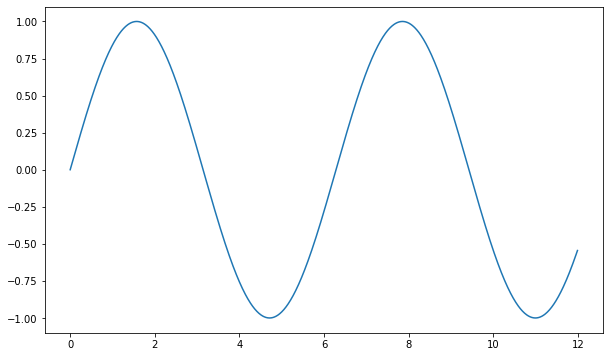

In [111]:
plt.figure(figsize=(10,6))    # 보여지는 창 10 * 6 Size  
plt.plot(t, y)
plt.show()                    # Sin 함수에 의한 그래프를 그리기   

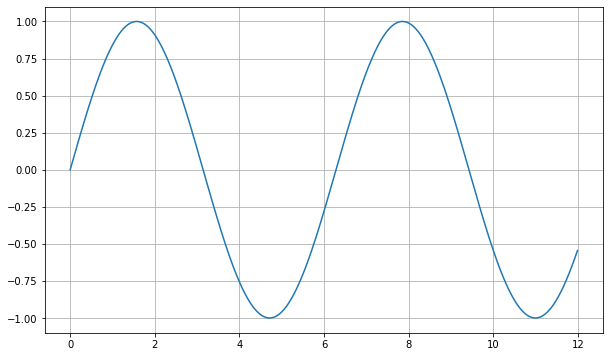

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.show()

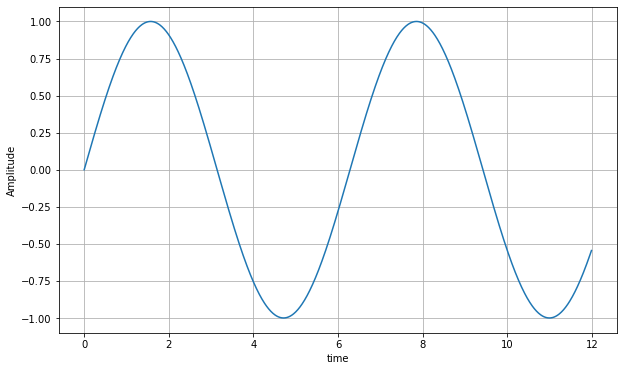

In [113]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

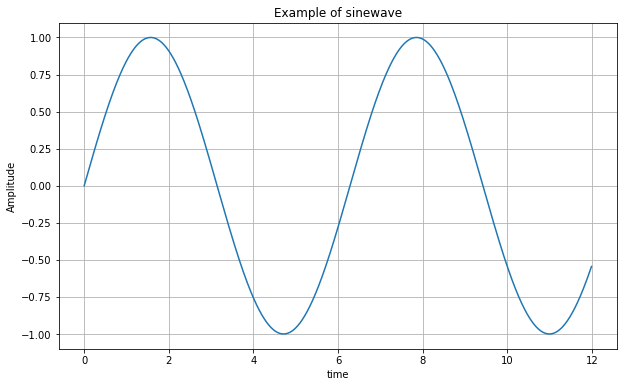

In [114]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')      # Head Title 적용하기 , 한글을 사용할 경우 적당한 폰트를 선택해 줌
plt.show()

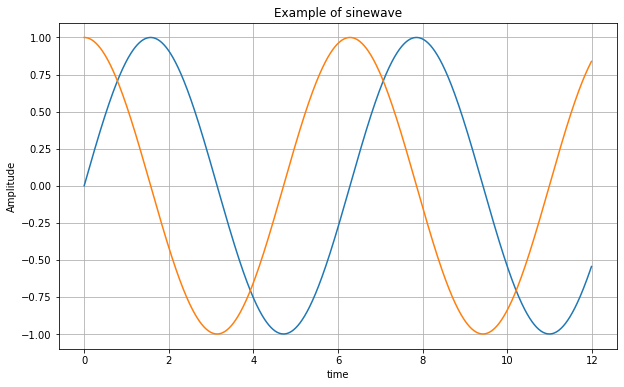

In [115]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

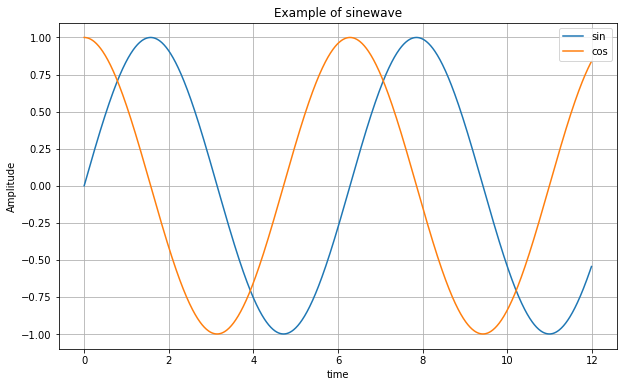

In [116]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

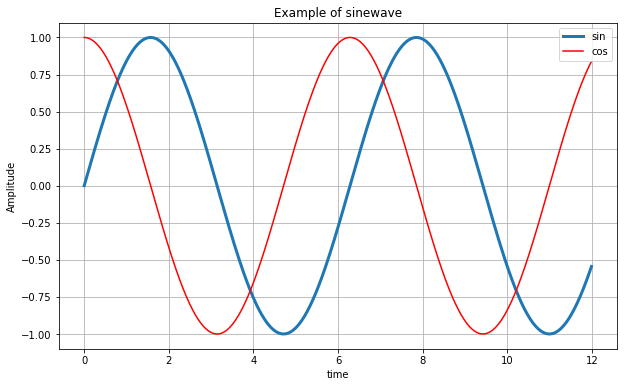

In [117]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

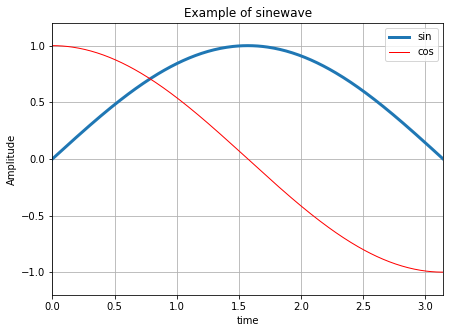

In [118]:
plt.figure(figsize=(7,5))
plt.plot(t, np.sin(t), lw=3, label='sin')    # lw : linewidth : 선굵기 
plt.plot(t, np.cos(t), 'r', lw=1, label='cos')     # r : red (색깔을 빨강색으로 표시)
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

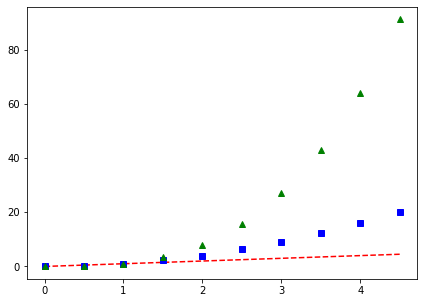

In [119]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(7,5))
plt.plot(t, t, 'r--')        # color : rgb값에 의한 표시  Ex) r-- : red  
plt.plot(t, t**2, 'bs')      #         b : slue , s : square marker : 사각박스 마커에 의한 청색 점    
plt.plot(t, t**3, 'g^')      #         g : green , ^ : 삼각형 marker (triAngle Marker)
plt.show()

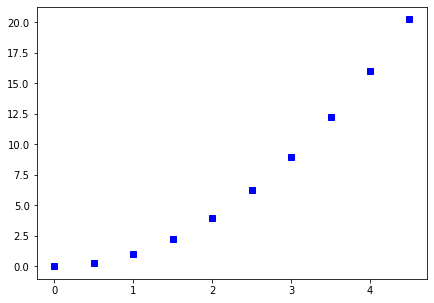

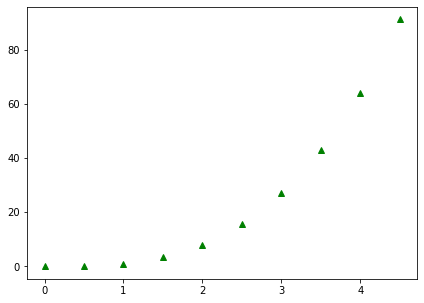

In [120]:
t = np.arange(0, 5, 0.5)       # 0에서 5까지 편차는 0.5씩 되어있는 배열값  

plt.figure(figsize=(7,5))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(7,5))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

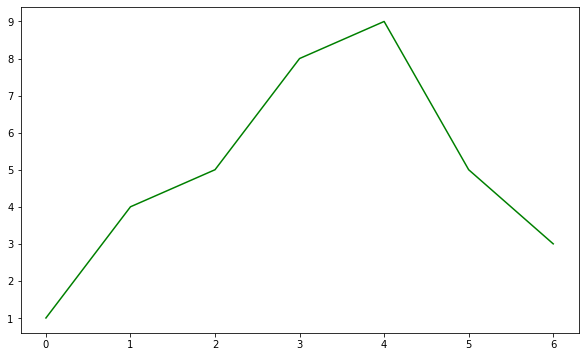

In [121]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

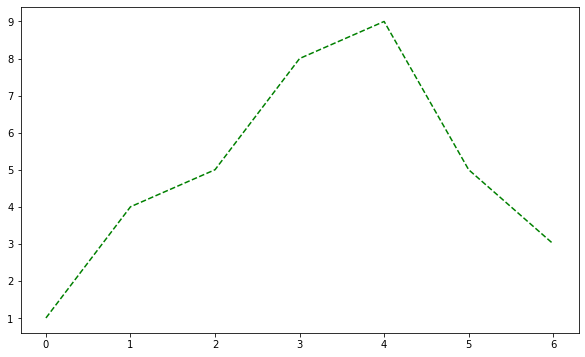

In [122]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

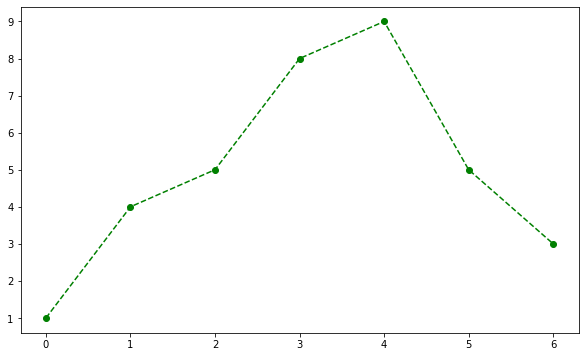

In [123]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

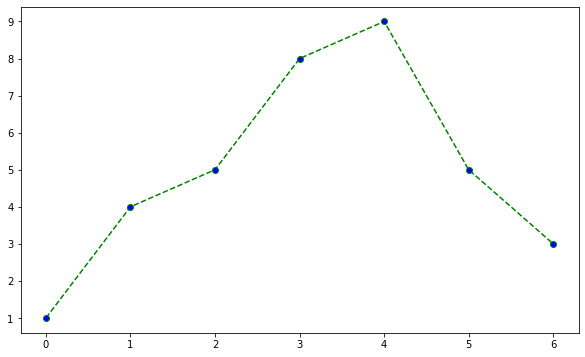

In [124]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

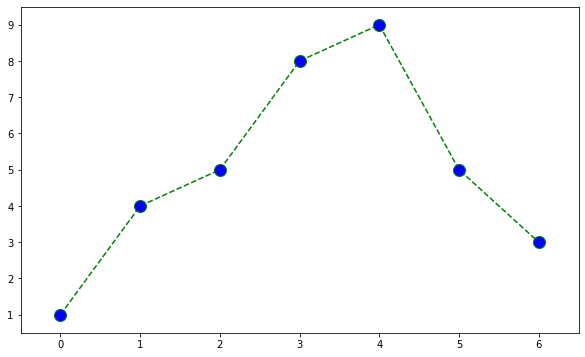

In [125]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [126]:
t = np.array([0,1,2,3,4,5,6,7,8,9])     # x 축의 값  
y = np.array([9,8,7,9,8,3,2,4,3,4])     # y 축의 값    

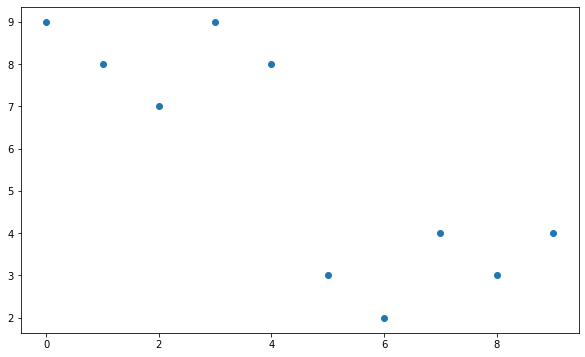

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)              # 산포도 : scatter chart  
plt.show()

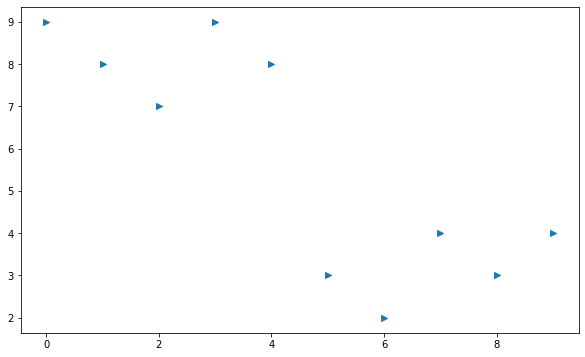

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

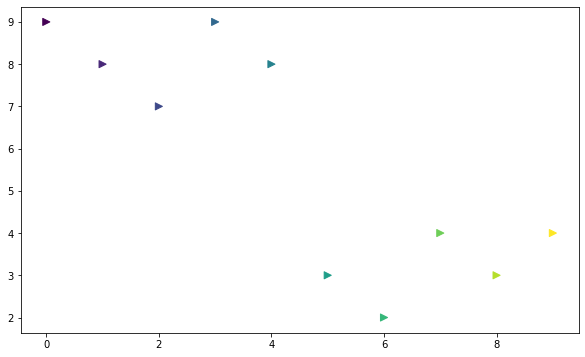

In [129]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

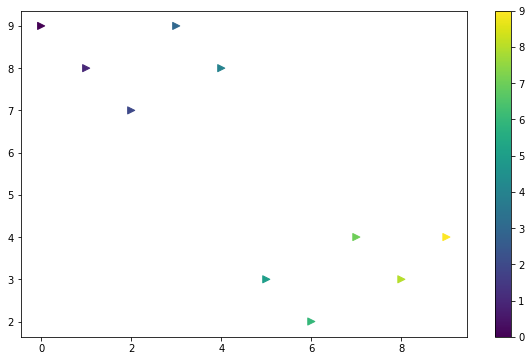

In [130]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')   # s:점의크기, c: color 
plt.colorbar()
plt.show()

### 산포도에 대한 보조 테스트 

### 스캐터 플롯(산포도)    ¶
- 2차원 데이터 즉, 두 개의 실수 데이터 집합의 상관관계를 살펴보려면 scatter 명령으로 스캐터 플롯을 그린다. 
- 스캐터 플롯의 점 하나의 위치는 데이터 하나의 x, y 값이다.
- 참고문서 : http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

- x, y : array_like, shape (n, )
  - The data positions.
- s : scalar or array_like, shape (n, ), optional
  - The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.
- c : color, sequence, or sequence of color, optional
  - The marker color. Possible values:

- A single color format string.
  - A sequence of color specifications of length n.
  - A sequence of n numbers to be mapped to colors using cmap and norm.
- A 2-D array in which the rows are RGB or RGBA.
  - Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. If you want to specify the same RGB or RGBA value for all points, use a 2-D array with a single row. Otherwise, value- matching will have precedence in case of a size matching with x and y.
- Defaults to None. In that case the marker color is determined by the value of color, facecolor or facecolors. In case those are not specified or None, the marker color is determined by the next color of the Axes' current "shape and fill" color cycle. This cycle defaults to rcParams["axes.prop_cycle"].
- marker : MarkerStyle, optional
  - The marker style. marker can be either an instance of the class or the text shorthand for a particular marker. Defaults to None, in which case it takes the value of rcParams["scatter.marker"] = 'o'. See markers for more information about marker styles.
- cmap : Colormap, optional, default: None
  - A Colormap instance or registered colormap name. cmap is only used if c is an array of floats. If None, defaults to rc image.cmap.
- norm : Normalize, optional, default: None
  - A Normalize instance is used to scale luminance data to 0, 1. norm is only used if c is an array of floats. If None, use the default colors.Normalize.
- vmin, vmax : scalar, optional, default: None
  - vmin and vmax are used in conjunction with norm to normalize luminance data. If None, the respective min and max of the color array is used. vmin and vmax are ignored if you pass a norm instance.
- alpha : scalar, optional, default: None
  - The alpha blending value, between 0 (transparent) and 1 (opaque).
- linewidths : scalar or array_like, optional, default: None
  - The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well. If None, defaults to rcParams lines.linewidth.
- edgecolors : color or sequence of color, optional, default: 'face'
  - The edge color of the marker. Possible values:
- 'face': The edge color will always be the same as the face color.
  - 'none': No patch boundary will be drawn.
- A matplotib color.
  - For non-filled markers, the edgecolors kwarg is ignored and forced to 'face' internally.

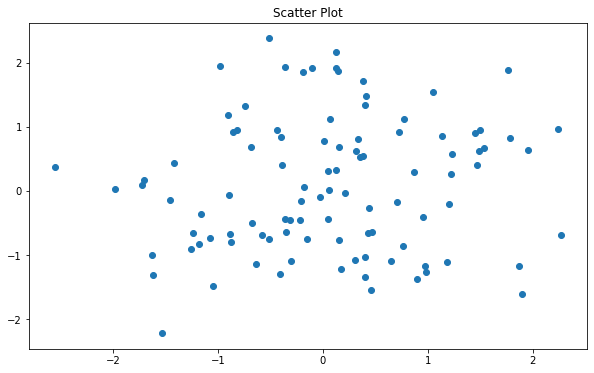

In [131]:
plt.figure(figsize=(10,6))

np.random.seed(0)                  # 임의의 숫자를 생성 
X = np.random.normal(0, 1, 100)    # normalize : 등부늘 짤랐다는 의미 , 0~1 , 100등분으로 처리 
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)                  # 100개의 임의의 숫자(random number) , 0~1 사이의 random number 
plt.show()

- 데이터가 2차원이 아니라 3차원 혹은 4차원인 경우에는 
  - 점 하나의 크기 혹은 색깔을 이용하여 다른 데이터 값을 나타낼 수도 있다. 
  - 이런 차트를 버블 차트(bubble chart)라고 한다. 
  - 크기는 s 인수로 색깔은 c 인수로 지정한다.

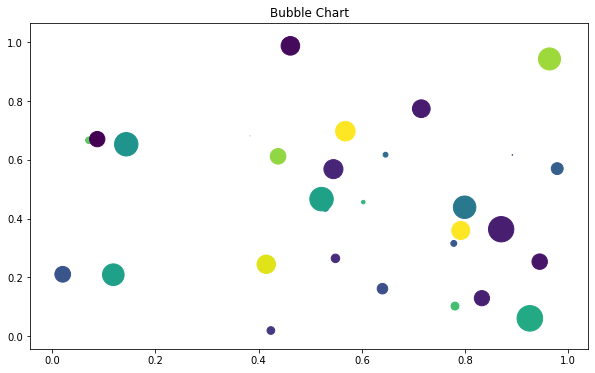

In [132]:
plt.figure(figsize=(10,6))

N = 30
np.random.seed(0)

x = np.random.rand(N)      #  임의의 30개의 random no.가 생성   
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N))**2

plt.title("Bubble Chart")
plt.scatter(x, y1, c=y2, s=y3)
plt.show()                # y1 , y2, y3 유형을 갖는 3개의 산포도가 그려진다.      

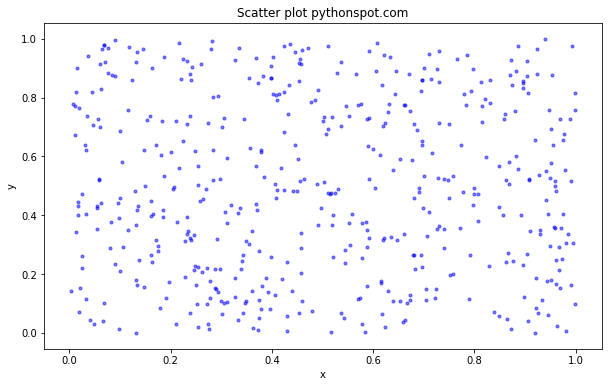

In [133]:
plt.figure(figsize=(10,6))

# Create data
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = 'b'             # (0,0,0)
area = np.pi*3
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

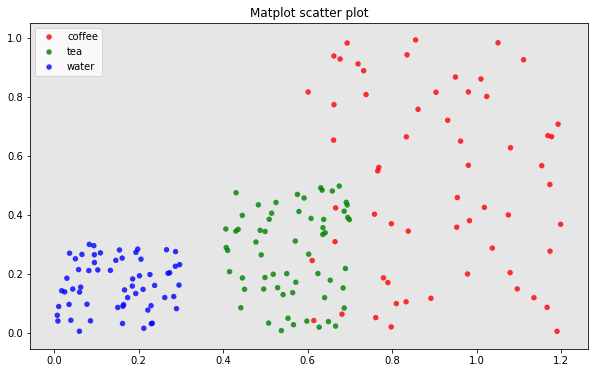

In [134]:
N= 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))
 
data = (g1, g2, g3)                    # 3개의 group data를 가진 scatter chart 그리기 
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water")
 
# Create plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1, facecolor="0.9")    # facecolor = "15.0"  -> 조정됨 , color값은 0~1사이의 값이 되어야 함 
 
for data, color, group in zip(data, colors, groups):
    x, y = data

    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

- 이렇게 다양한 챠트를 그릴 수가 있다.  (교제내용 계속)  

In [135]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

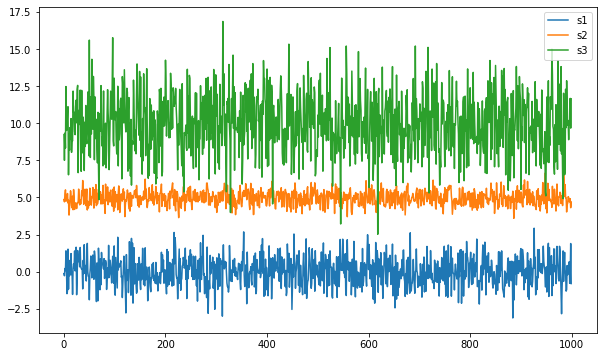

In [136]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

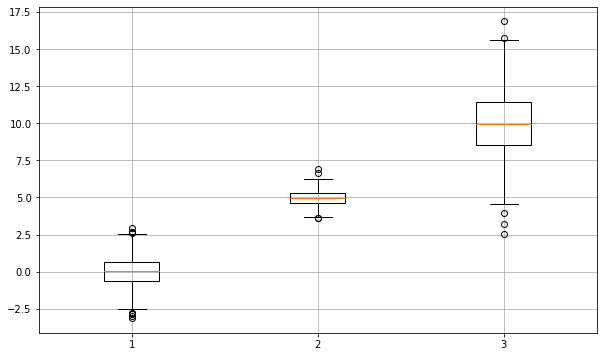

In [137]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

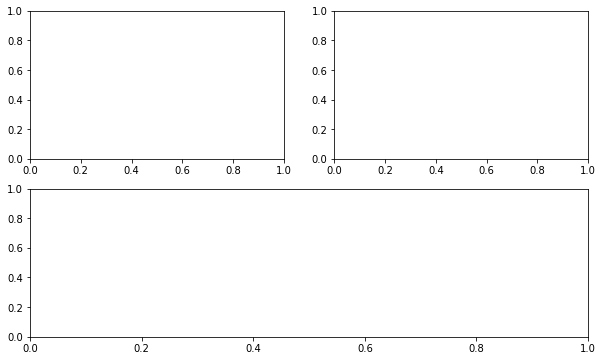

In [138]:
plt.figure(figsize=(10,6))

plt.subplot(221)      # 2 : 세로 2등분, 2 : 가로이등분 , 1 : 그중의 첫번째 
plt.subplot(222)
plt.subplot(212)      # 2: 세로 2등분, 1: 가로 1등분(전체), 2: 두번째 영역 

plt.show()

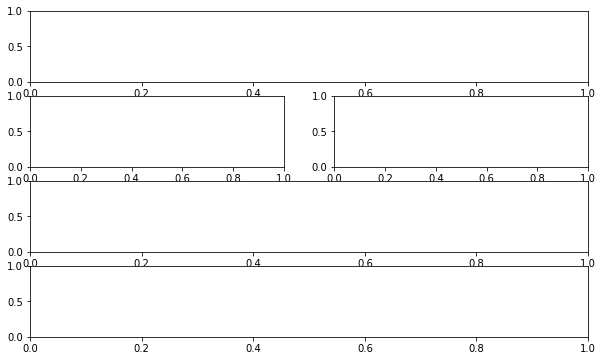

In [139]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

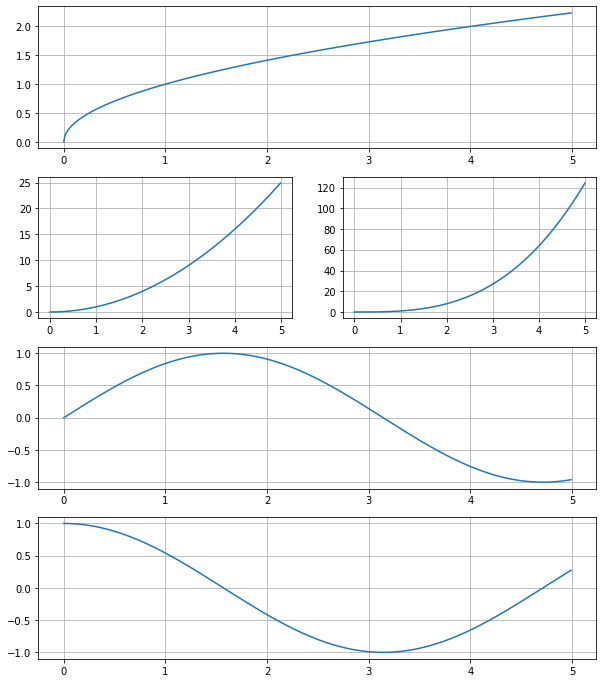

In [140]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

### 한글서체 세팅  
- matplotlib에서는 기본적으로 한글이 지원되지 않는다.  
- 작업을 하기전에 먼저 
  - matplotlib의 폰트를 변경해야 한다.   
  - 아래의 소스를 통해서 변경할 수가 있고  
  - 그 중에 Windows부분을 보면 맑은고딕체로 기본 서체가 적용된 것을 확인할 수가 있다.  

In [141]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [142]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


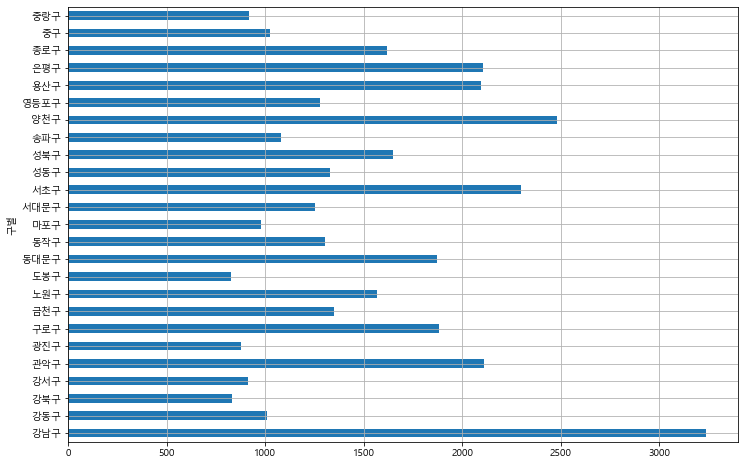

In [143]:
plt.figure()     # figsize=(10,8)
data_result['소계'].plot(kind='barh', grid=True, figsize=(12,8))  # barh : 수평막대그래프 
plt.show()

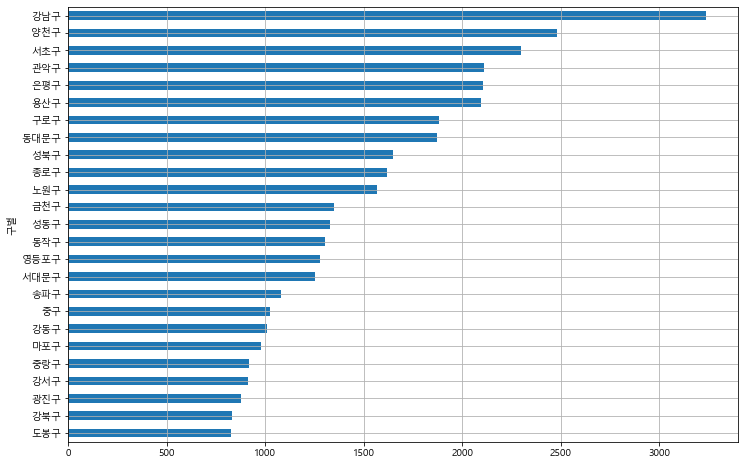

In [144]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(12,8))
plt.show()

In [145]:
data_result['CCTV 설치비율'] = data_result['소계'] / data_result['인구수'] * 100  
                          # 설치비율 = CCTV설치갯수 / 인구수 

data_result.sort_values('CCTV 설치비율', ascending = False).head() 

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 설치비율
구별,,,,,,,,,
종로구,1619,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,0.994350
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302
중구,1023,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,0.767787
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458


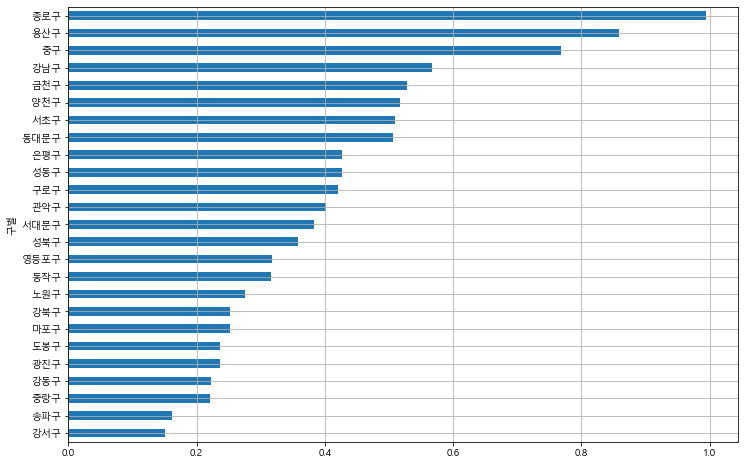

In [146]:
data_result['CCTV 설치비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(12,8))
plt.show()

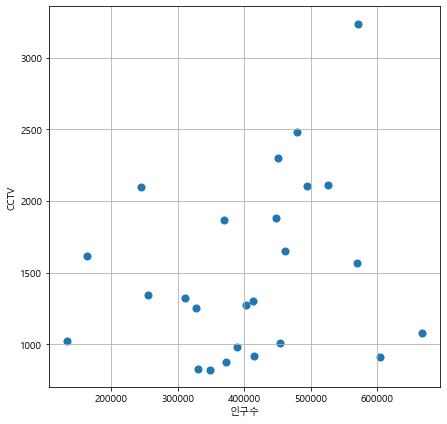

In [147]:
plt.figure(figsize=(7,7))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)   # s : 마커크기 
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [148]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.15151285e-03, 1.04561312e+03])

In [149]:
f1 = np.poly1d(fp1)                    # y = 좌표 데이터       
fx = np.linspace(100000, 700000, 100)  # x 축은 10만 ~ 70만 긋고 100명 단위 눈금표시 

- polyfit : 널뛰기 하는 데이터 속에서 원형을 찾아내는 작업 함수  
  - ployfit : x축의 값의 원형   
  - ploy1d : y축의 값의 원형을 구하는 함수  

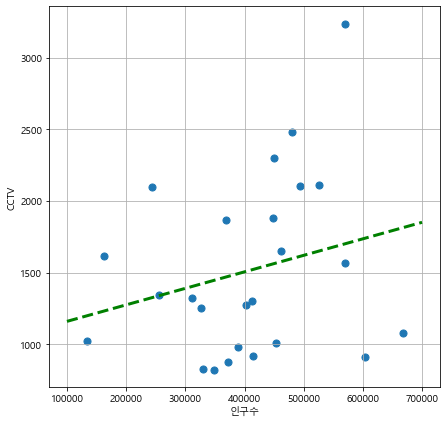

In [150]:
plt.figure(figsize=(7,7))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')   # 실선그래프로 각 점을 서로 연결  
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### polyfit에 대하여 
- 참고문서 : https://pinkwink.kr/1127  (저자의 추가설명 문서)  
- 아래 그림은 
  . 일단, 기울기가 3이고, 흔히 말하는 y 절편이 5입니다.^^

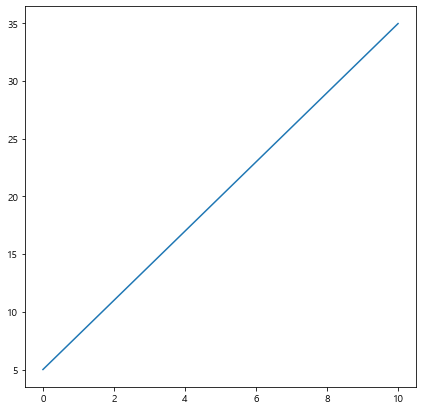

In [151]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0, 10, 0.01)
y = 3*t + 5

plt.figure(figsize=(7,7))
plt.plot(t, y)
plt.show()

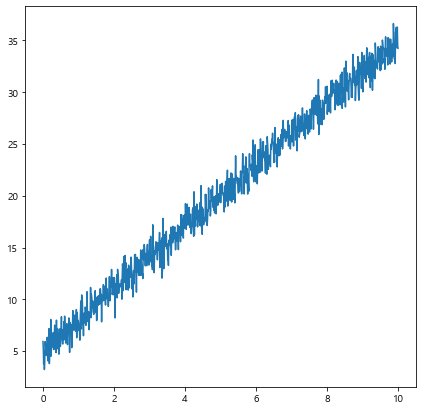

In [152]:
# 노이즈(잡음신호)를 한스푼 정도 넣어보겠습니다.  

y_noise = y + np.random.randn(len(y))

plt.figure(figsize=(7,7))
plt.plot(t, y_noise)
plt.show()

- 그런데 나는 저 데이터에서 직선을 찾고 싶다는 거죠^^ 
- 직선을 구성하는 것은 기울기와 절편입니다. 
  - 그 값을 알면 직선을 알게 되는 거죠...

In [153]:
fp1 = np.polyfit(t, y_noise, 1)     # t : x축의 값   
fp1

array([2.99901969, 5.03311293])

- polyfit 명령으로 쉽게 찾을 수 있습니다. 
  - polyfit에서 세번쨰 인자는 찾고자 하는 함수의 차수입니다. 
  - 2를 넣어주면 2차식의 계수를 찾아달라고 하는 거죠.  
- 아무튼 직선이니 저 결과는 저렇게 나옵니다. 
  - 애초 원 데이터의 기울기와 절편의 값과 유사합니다. 괜찮은거죠^^ 
  - 그런데.. 말이죠.. 저 계수를 가지고, 예측값을 찾을 수 없습니다. 
  - 함수(function)로 만들어 줘서 입력을 주고 결과를 얻을 수 있어야 하는거죠.

In [154]:
# poly1d : A one-dimensional polynomial class.
f1 = np.poly1d(fp1)       # fp1 : y축의 값 
f1

poly1d([2.99901969, 5.03311293])

- 위에 보이는 poly1d 함수를 사용해서 polynomial class를 만들어 주면 됩니다.
- 폴리노미얼 클래스(다항식)는 수학정인 다항식으로 취급되면서 또 위 코드처럼 first class로 표현해서 코드에서 함수로 사용할 수도 있습니다. 
- 여기서, polynomial 클래스 이야기를 조금 더 하면 말이죠~
- 위 두 일차식의 항을 표현해보면

In [155]:
np.poly1d([1, 1]) + np.poly1d([1, -1])

poly1d([2, 0])

- 이렇게 됩니다. 
  - 이 결과는 당연히 이렇게 되죠... 
  - polynimial class가 이해되시나요? 하나 더???
- 그럼 곱하기 가야죠.. 우린 저 결과를 압니다만...

In [156]:
np.poly1d([1, 1]) * np.poly1d([1, -1])

poly1d([ 1,  0, -1])

- 해보면
  - 이렇죠^^
- 이번엔.. 나눗셈 가보죠^^

In [157]:
np.poly1d([1, -2, 1]) / np.poly1d([1, -1])

(poly1d([ 1., -1.]), poly1d([0.]))

이렇게 하면...

이렇게 되죠.. 바로.. 다항식 연산이 가능한 numpy의 클래스 중 하나입니다. 그리고, 오늘 이 poly1d 함수를 이용해서 우리도 결과를 얻어봐야죠.

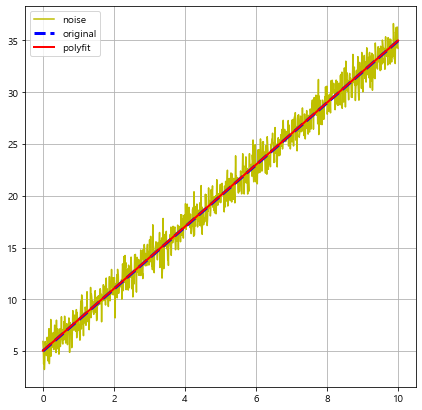

In [158]:
plt.figure(figsize=(7,7))
plt.plot(t, y_noise, label='noise', color='y')
plt.plot(t, y, ls='dashed', lw=3, color='b', label='original')
plt.plot(t, f1(t), lw=2, color='r', label='polyfit')
plt.grid()
plt.legend()
plt.show()

2차함수로 fit하고, 노이즈를 좀 많이 넣어보죠^^ 이제는 원 값과의 오차가 좀 생기겠죠^^

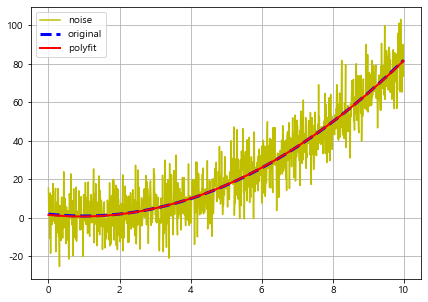

In [159]:
y = np.square(t-1) + 1
y_noise = y + 10*np.random.randn(len(y))
fp1 = np.polyfit(t, y_noise, 2)
f1 = np.poly1d(fp1)

plt.figure(figsize=(7,5))
plt.plot(t, y_noise, label='noise', color='y')
plt.plot(t, y, ls='dashed', lw=3, color='b', label='original')
plt.plot(t, f1(t), lw=2, color='r', label='polyfit')
plt.grid()
plt.legend()
plt.show()

어때요? 괜찮죠...^^

# 10. 조금더 설득력 있는 자료 만들기

In [160]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 설치비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
송파구,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369


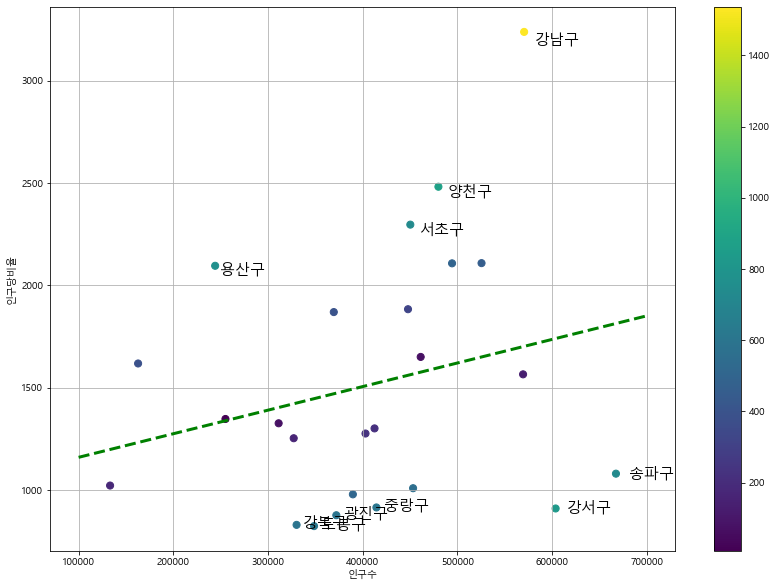

In [161]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다